In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Create the plots directory if it doesn't exist
os.makedirs("../plots", exist_ok=True)

# Load data
df = pd.read_csv("../data/processed_data/CREMP_SCOR_Summaries_2023_LTA.csv")

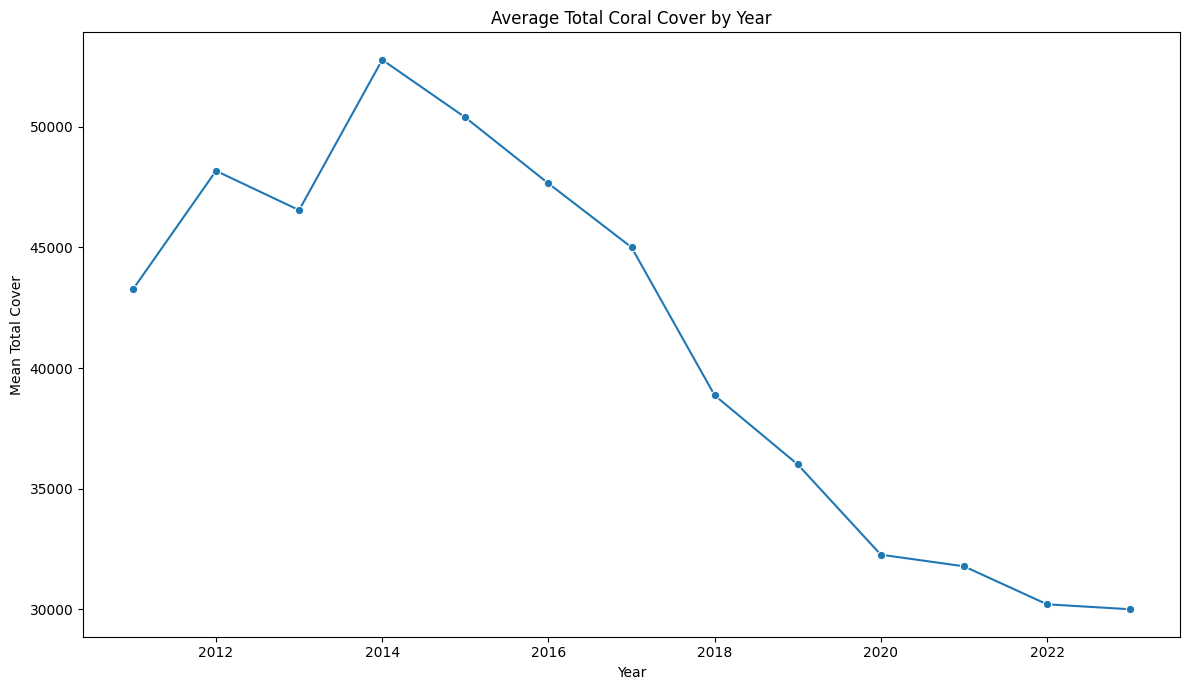

In [2]:
# Drop metadata columns and keep only species columns
metadata_cols = ['Year', 'Date', 'Subregion', 'Habitat', 'SiteID', 'Site_name', 'StationID', 'row_index']
species_cols = [col for col in df.columns if col not in metadata_cols]

# Total coral cover by year
df['Total_Cover'] = df[species_cols].sum(axis=1)
yearly_cover = df.groupby('Year')['Total_Cover'].mean().reset_index()

plt.figure(figsize=(12, 7))
sns.lineplot(data=yearly_cover, x='Year', y='Total_Cover', marker='o')
plt.title("Average Total Coral Cover by Year")
plt.xlabel("Year")
plt.ylabel("Mean Total Cover")
plt.tight_layout()
plt.savefig("../plots/total_coral_cover_by_year.png")
plt.show()
plt.close()

C:\Users\Elite\AppData\Local\Temp\ipykernel_25356\196363742.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=species_means.values, y=species_means.index, palette="viridis")


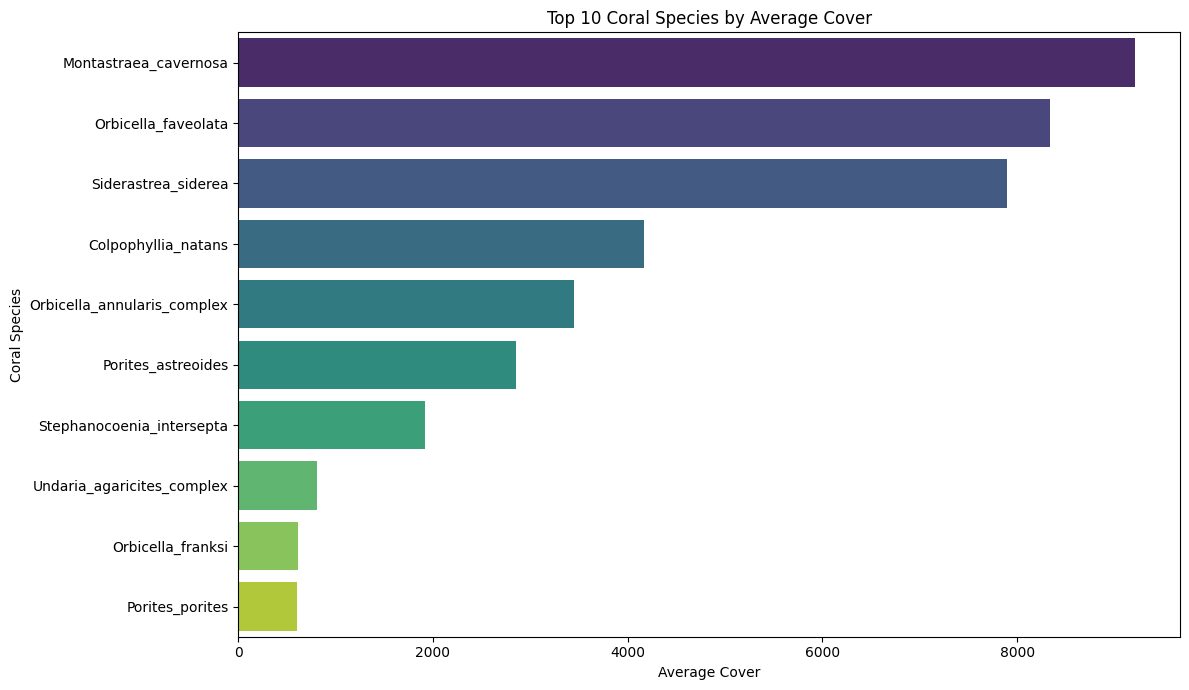

In [3]:
# Top 10 coral species by mean cover
species_means = df[species_cols].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 7))
sns.barplot(x=species_means.values, y=species_means.index, palette="viridis")
plt.title("Top 10 Coral Species by Average Cover")
plt.xlabel("Average Cover")
plt.ylabel("Coral Species")
plt.tight_layout()
plt.savefig("../plots/top_10_species_avg_cover.png")
plt.show()
plt.close()

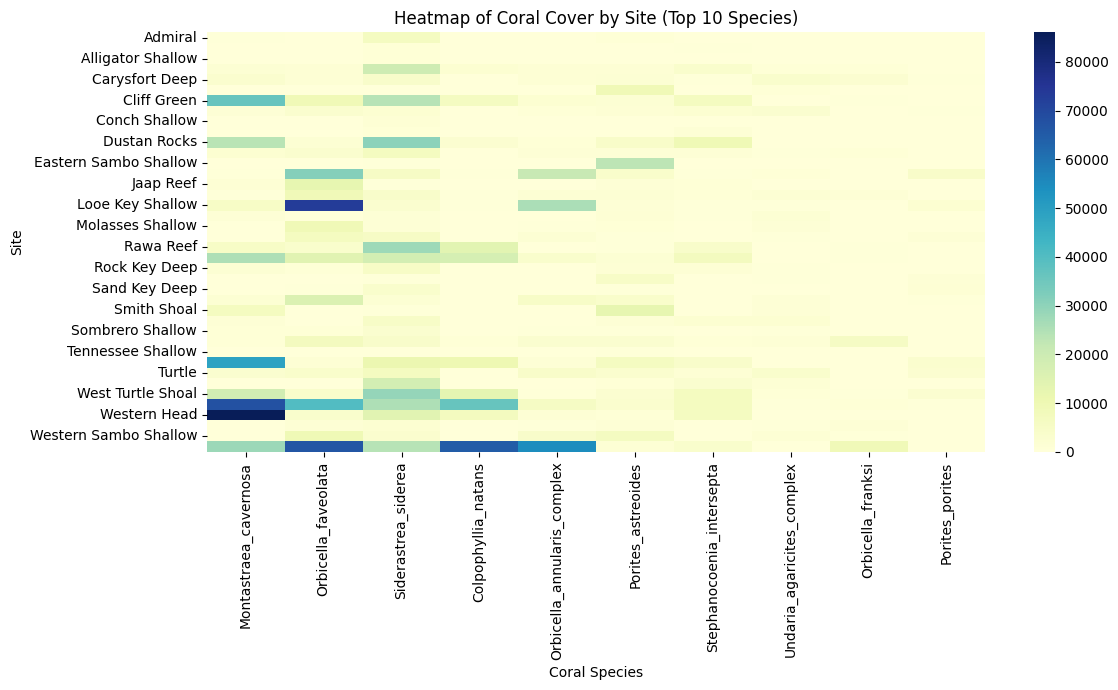

In [4]:
# Heatmap of species cover per site (top 10 species only)
top_species = species_means.index.tolist()
heat_data = df.groupby('Site_name')[top_species].mean()

plt.figure(figsize=(12, 7))
sns.heatmap(heat_data, cmap="YlGnBu", annot=False)
plt.title("Heatmap of Coral Cover by Site (Top 10 Species)")
plt.xlabel("Coral Species")
plt.ylabel("Site")
plt.tight_layout()
plt.savefig("../plots/heatmap_species_by_site.png")
plt.show()
plt.close()

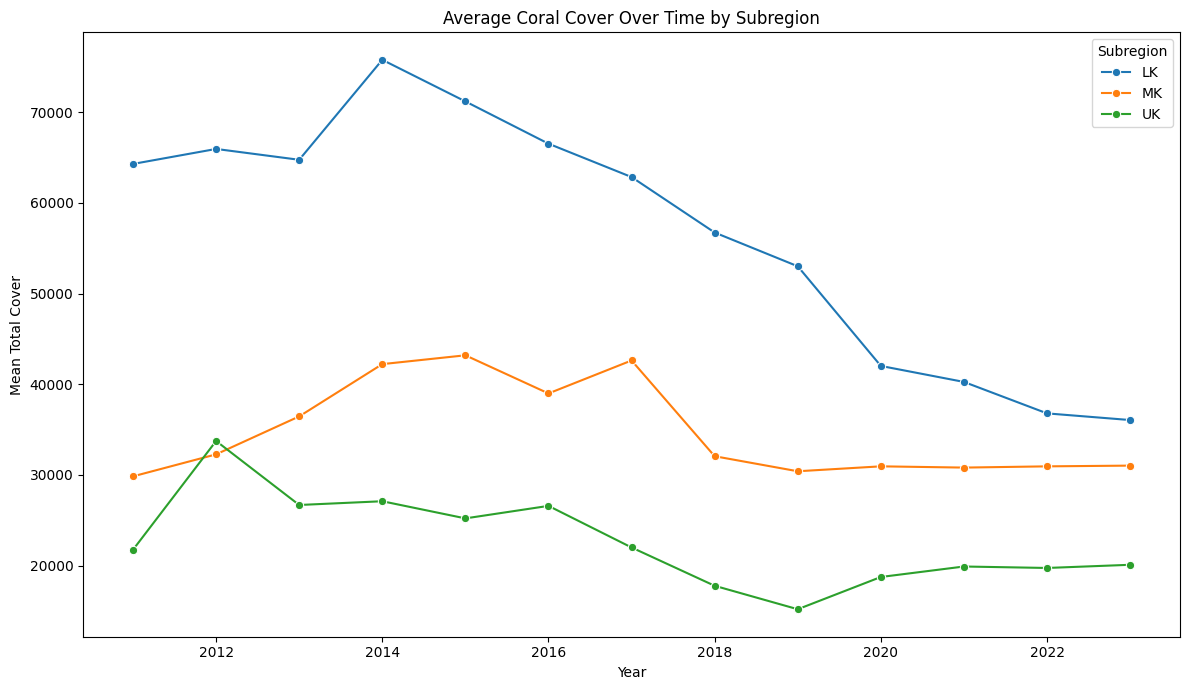

In [5]:
# Trends by Subregion over Time
subregion_year = df.groupby(['Year', 'Subregion'])['Total_Cover'].mean().reset_index()

plt.figure(figsize=(12, 7))
sns.lineplot(data=subregion_year, x='Year', y='Total_Cover', hue='Subregion', marker='o')
plt.title("Average Coral Cover Over Time by Subregion")
plt.xlabel("Year")
plt.ylabel("Mean Total Cover")
plt.legend(title='Subregion')
plt.tight_layout()
plt.savefig("../plots/subregion_trends_over_time.png")
plt.show()
plt.close()

<Figure size 1200x700 with 0 Axes>

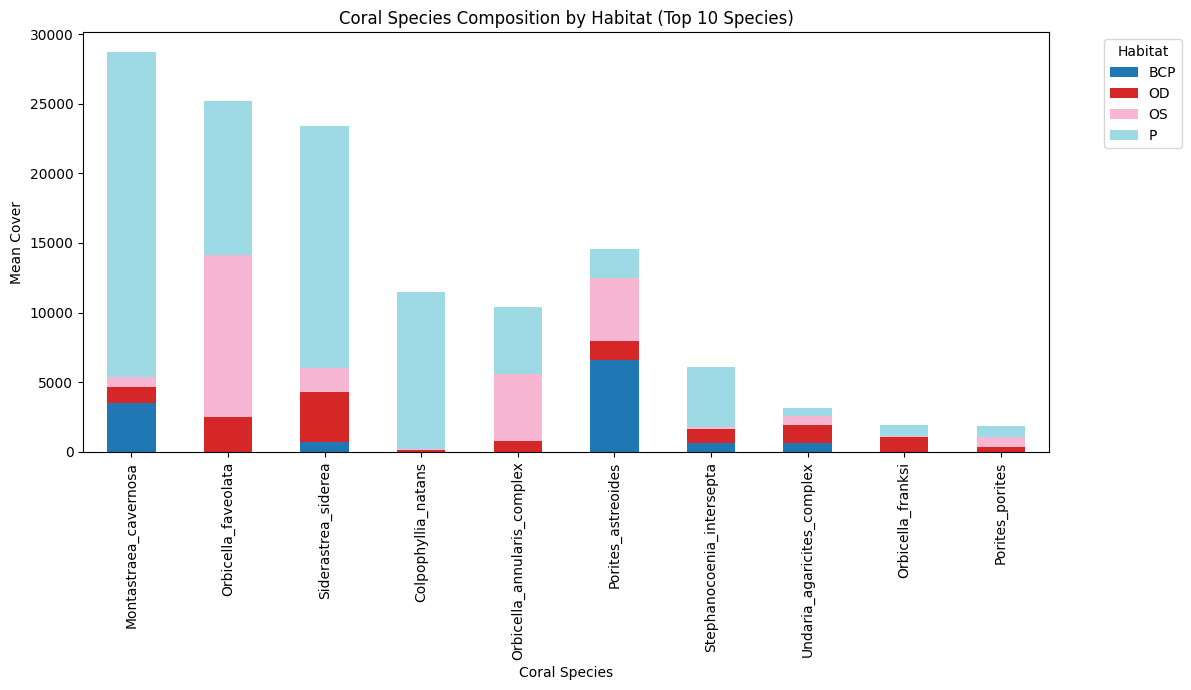

In [6]:
# Coral composition by Habitat
habitat_composition = df.groupby('Habitat')[top_species].mean().T

plt.figure(figsize=(12, 7))
habitat_composition.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='tab20')
plt.title("Coral Species Composition by Habitat (Top 10 Species)")
plt.xlabel("Coral Species")
plt.ylabel("Mean Cover")
plt.legend(title="Habitat", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("../plots/habitat_composition.png")
plt.show()
plt.close()